In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
sd = "data/us_county.shp"
mapdf = gpd.read_file(sd)
csv = "data/covid_us_county.csv"
df=pd.read_csv(csv)

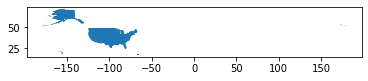

In [3]:
mapdf.plot()

In [10]:
mapdf

,fips,geometry
0,01001,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,01001,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
2,01001,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
3,01001,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
4,01003,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
...,...,...
12875,72151,"POLYGON ((-66.01040 18.07201, -66.00861 18.073..."
12876,72153,"POLYGON ((-66.92652 18.15127, -66.92143 18.152..."
12877,72153,"POLYGON ((-66.92652 18.15127, -66.92143 18.152..."
12878,72153,"POLYGON ((-66.92652 18.15127, -66.92143 18.152..."


In [22]:
df.describe()

,fips,lat,long,cases,deaths
count,672660.000000,674680.000000,674680.000000,674680.000000,674680.000000
mean,33061.684685,36.707212,-88.601474,430.939319,19.805678
std,18636.155794,9.061571,21.715746,3891.416647,314.508761
min,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,31014.000000,38.002344,-89.486710,6.000000,0.000000
75%,47131.000000,41.573069,-82.311265,84.000000,2.000000
max,99999.000000,69.314792,145.673900,228069.000000,23586.000000


In [33]:
rdf=df[df['date'].str.contains("2020-08-10")]

In [35]:
rdf=rdf[rdf['state'].str.contains("Florida")]

In [36]:
rdf

,fips,county,state,lat,long,date,cases,state_code,deaths
81405,12001.0,Alachua,Florida,29.678665,-82.359282,2020-08-10,4171,FL,26
81607,12003.0,Baker,Florida,30.330601,-82.284675,2020-08-10,932,FL,4
81809,12005.0,Bay,Florida,30.265487,-85.621226,2020-08-10,4447,FL,51
82011,12007.0,Bradford,Florida,29.950797,-82.166116,2020-08-10,508,FL,4
82213,12009.0,Brevard,Florida,28.294095,-80.730910,2020-08-10,6099,FL,151
...,...,...,...,...,...,...,...,...,...
94333,12129.0,Wakulla,Florida,30.165489,-84.398952,2020-08-10,707,FL,4
94535,12131.0,Walton,Florida,30.642040,-86.169357,2020-08-10,1414,FL,15
94737,12133.0,Washington,Florida,30.613593,-85.660025,2020-08-10,872,FL,14
653267,80012.0,Out of FL,Florida,0.000000,0.000000,2020-08-10,0,FL,0


In [38]:
mapdf['fips']=mapdf['fips'].astype('float')

In [46]:
merged=pd.merge(mapdf,rdf,how='inner',on='fips')

In [55]:
merged.describe()

,fips,lat,long,cases,deaths
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,12067.910448,28.940755,-82.700744,8003.940299,123.537313
std,38.467548,1.524522,1.753864,18675.242243,275.034861
min,12001.000000,25.209047,-87.372846,148.000000,2.000000
25%,12035.000000,27.492939,-83.604454,872.000000,7.000000
50%,12069.000000,29.459336,-82.318310,1903.000000,37.000000
75%,12101.000000,30.265487,-81.340720,6573.000000,120.000000
max,12133.000000,30.867475,-80.431098,133623.000000,1874.000000


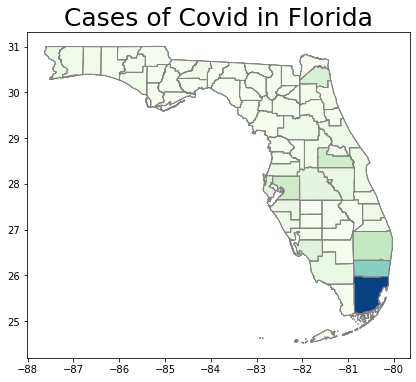

In [63]:
#set to min and max of data
vmin, vmax = 0, 133623

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))

# add a title and annotation
ax.set_title('Cases of Covid in Florida', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create map
merged.plot(column='cases', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')



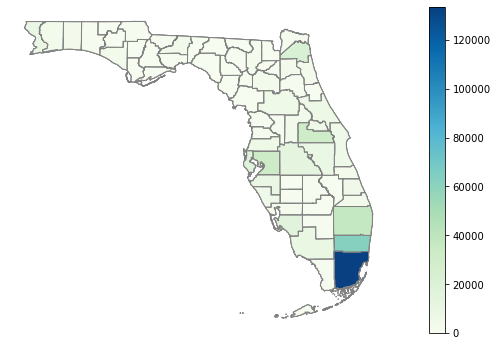

In [69]:
#set to min and max of data
vmin, vmax = 0, 133623

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))

# remove the axis
ax.axis('off')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

#add colorbar
cbar = fig.colorbar(sm)

# create map
merged.plot(column='cases', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')

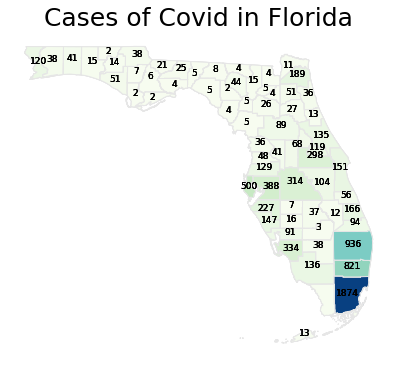

In [65]:
#set to min and max of data
vmin, vmax = 0, 133623

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Cases of Covid in Florida', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Add location for the labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Display names 
for idx, row in merged.iterrows():
    plt.annotate(s=row['deaths'], xy=row['coords'],horizontalalignment='center',fontsize=9)


# create map
merged.plot(column='deaths', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.9')